Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, **by predicting the probability that somebody will experience financial distress in the next two years**.

The goal of this competition is to build a model that borrowers can use to help make the best financial decisions.

Historical data are provided on 250,000 borrowers and the prize pool is $5,000 ($3,000 for first, $1,500 for second and $500 for third).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_raw = pd.read_csv('cs-training.csv', index_col=0)
test_raw = pd.read_csv('cs-test.csv',index_col=0)

In [3]:
train_raw.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
print(train_raw.shape)
print(test_raw.shape)

(150000, 11)
(101503, 11)


In [5]:
train_raw.dtypes

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [6]:
train_raw.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [7]:
test_raw.dtypes

SeriousDlqin2yrs                        float64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

<AxesSubplot:>

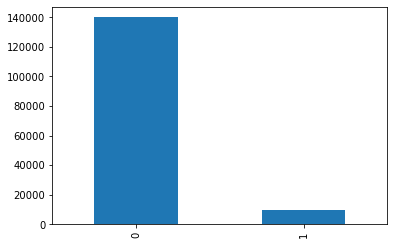

In [8]:
#View target value distribution
train_raw['SeriousDlqin2yrs'].value_counts().plot.bar()

In [9]:
class0 = train_raw['SeriousDlqin2yrs'].value_counts()[0]
class1 = train_raw['SeriousDlqin2yrs'].value_counts()[1]
print('Default rate is {:.2f}%'.format((class1/(class0+class1))*100))

Default rate is 6.68%


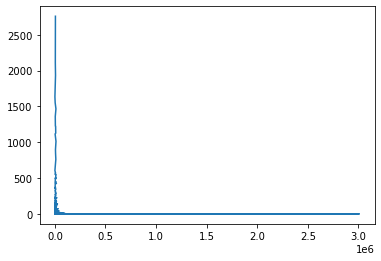

In [10]:
plt.plot(train_raw['MonthlyIncome'].value_counts())
plt.show()

<AxesSubplot:xlabel='MonthlyIncome'>

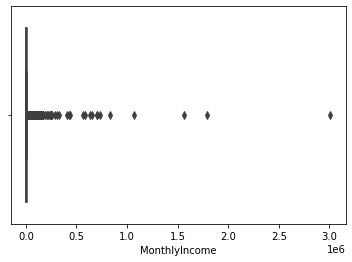

In [11]:
sns.boxplot(x = train_raw['MonthlyIncome'])

<AxesSubplot:>

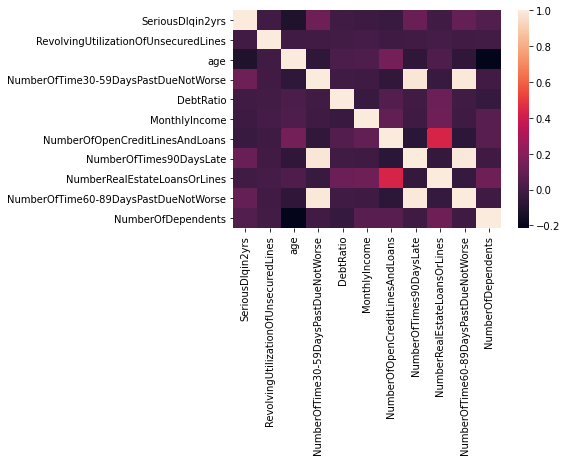

In [12]:
sns.heatmap(train_raw.corr())

<AxesSubplot:xlabel='NumberOfDependents'>

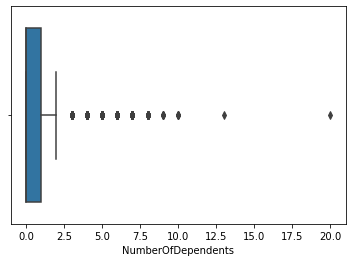

In [13]:
sns.boxplot(x=train_raw['NumberOfDependents'])

<AxesSubplot:>

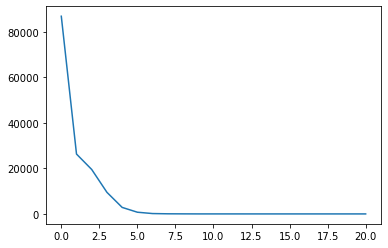

In [14]:
train_raw['NumberOfDependents'].value_counts().plot()

#### Impute null rows with mean

In [15]:
train_raw['MonthlyIncome'].fillna(train_raw['MonthlyIncome'].mean(),inplace=True)

In [16]:
train_raw['NumberOfDependents'].fillna(train_raw['NumberOfDependents'].mean(),inplace=True)

In [17]:
train_raw.isna().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [18]:
#repeat same for test data set
test_raw['MonthlyIncome'].fillna(test_raw['MonthlyIncome'].mean(),inplace=True)
test_raw['NumberOfDependents'].fillna(test_raw['NumberOfDependents'].mean(),inplace=True)

### Prepare model

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score

In [20]:
y = train_raw['SeriousDlqin2yrs']
X = train_raw.drop('SeriousDlqin2yrs',axis=1)


In [21]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y,random_state=1)

In [22]:
rfc = RandomForestClassifier(n_jobs=-1)

In [23]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1)

In [24]:
prediction=rfc.predict(X_valid)

In [25]:
print('Mean absolute error: {}'.format(mean_absolute_error(prediction,y_valid)))
print('Accuracy score: {}'.format(accuracy_score(prediction,y_valid)))

Mean absolute error: 0.06490666666666667
Accuracy score: 0.9350933333333333


### Submission

In [26]:
test_X = test_raw.drop('SeriousDlqin2yrs',axis=1)

In [27]:
test_pred = rfc.predict(test_X)

In [28]:
test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
ids = np.arange(1,101504)

In [38]:
submission = pd.DataFrame({'ID':ids,'Probability':test_pred})

In [41]:
submission.to_csv('rfc_pred.csv', index=False)